<a href="https://colab.research.google.com/github/nikamvijay526-creator/text-analytics-for-spam-detection-using-naive-byers/blob/main/firstproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import pandas as pd

In [60]:
import os
print(os.listdir("../content"))

['.config', 'sample_data']


In [61]:
message = pd.read_csv('/content/sample_data/spam.csv', encoding='latin-1')
message.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [62]:
for message_no,message in enumerate(message[:10]):
    print(message_no,message)
    print('\n')

0 v1


1 v2


2 Unnamed: 2


3 Unnamed: 3


4 Unnamed: 4




In [63]:
import pandas as pd

In [64]:
import pandas as pd
message = pd.read_csv('/content/sample_data/spam.csv', encoding='latin-1')
message = message.iloc[:, [0, 1]]
message.columns = ['labels', 'message']
message.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#Exploratory Data Analysis

In [65]:
message.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [66]:
message.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [67]:
message['length']=message['message'].apply(len)
message.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


#Data visualization

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: ylabel='Frequency'>

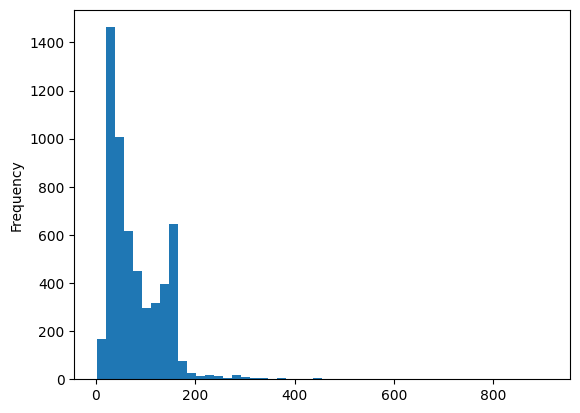

In [69]:
message['length'].plot(bins=50,kind='hist')

In [70]:
message.length.describe()

,length
count,5572.000000
mean,80.118808
std,59.690841
min,2.000000
25%,36.000000
50%,61.000000
75%,121.000000
max,910.000000


In [71]:
message[message['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

#Text Pre-processing

In [72]:
import string
mess = 'sample message!...'
nopunc=[char for char in mess if char not in string.punctuation]
nopunc=''.join(nopunc)
print(nopunc)

sample message


In [73]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stopwords.words('english')[0:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

In [74]:
nopunc.split()

['sample', 'message']

In [75]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [76]:
clean_mess

['sample', 'message']

In [77]:
def text_process(mess):
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [78]:
message.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [79]:
# Re-import or ensure message is the DataFrame if it was overwritten
import pandas as pd
message = pd.read_csv('/content/sample_data/spam.csv', encoding='latin-1')
message = message.iloc[:, [0, 1]]
message.columns = ['labels', 'message']

# Now apply the function
message['message'].head(5).apply(text_process)

,message
0,"[Go, jurong, point, crazy, Available, bugis, n..."
1,"[Ok, lar, Joking, wif, u, oni]"
2,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,"[U, dun, say, early, hor, U, c, already, say]"
4,"[Nah, dont, think, goes, usf, lives, around, t..."


In [80]:
message.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#Vectorization

In [81]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(message['message'])
print(len(bow_transformer.vocabulary_))

In [ ]:
message4=message['message'][3]
print(message4)

In [ ]:
bow4=bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

In [ ]:
# In scikit-learn >= 1.0, use get_feature_names_out() instead of get_feature_names()
print(bow_transformer.get_feature_names_out()[4073])
print(bow_transformer.get_feature_names_out()[9570])

In [ ]:
messages_bow = bow_transformer.transform(message['message'])

In [ ]:
print('Shape of Sparse Matrix: ',messages_bow.shape)
print('Amount of non-zero occurences:',messages_bow.nnz)

In [ ]:
sparsity =(100.0 * messages_bow.nnz/(messages_bow.shape[0]*messages_bow.shape[1]))
print('sparsity:{}'.format(round(sparsity)))

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

In [ ]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

In [ ]:
messages_tfidf=tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

#Training Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf,message['labels'])

In [ ]:
print('predicted:',spam_detect_model.predict(tfidf4)[0])
print('expected:',message.labels[3])

#Model evaluation

In [ ]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(message['labels'],all_predictions))
print(confusion_matrix(message['labels'],all_predictions))

#Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test = train_test_split(message['message'],message['labels'],test_size=0.2)

In [ ]:
print(len(msg_train),len(msg_test),len(label_train),len(label_test))

#Creating a Data Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
   ( 'bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

In [ ]:
pipeline.fit(msg_train,label_train)

In [ ]:
predictions = pipeline.predict(msg_test)

In [ ]:
print(classification_report(predictions,label_test))